In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 

### Question 1 - Import the data set below and do a full regression analysis.

- Plot the data and choose a regression model
- Separate your data into training and validation data using train_test_split
- Train your model using the training data
- Plot your model prediction on BOTH the training and validation data
- Report mean squared error for BOTH the training and validata data
- Plot a learning curve (you can use the code from the lecture)

#### THEN

- Reassess your model selection. You should try a few different polynomials and even linear regression before you are convinced you have a "good enough" model. This experimentation should be reflected in Question 2 where you discuss your approach and things you tried.

In [2]:
# Data for question 1
df_regdata = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/Poly_data.csv',  
    sep=',')
df_regdata.head()

,X data,y data
0,-1.397830,4.622079
1,2.271780,4.009634
2,1.784556,2.406014
3,0.950711,1.375759
4,2.103490,4.154755


(500, 1) (500, 1)
(400, 1) (100, 1) (400, 1) (100, 1)


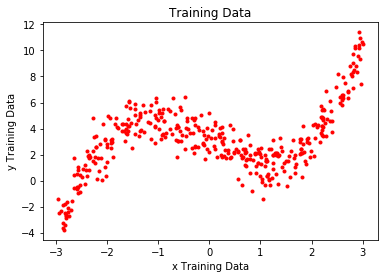

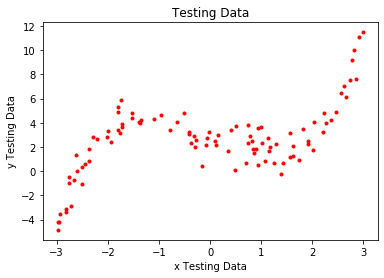

In [3]:
x = df_regdata[['X data']].to_numpy()
y = df_regdata[['y data']].to_numpy()
print(x.shape, y.shape)

#Establish training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#Plot both training and testing data
plt.plot(x_train, y_train, 'r.')
plt.xlabel('x Training Data')
plt.ylabel('y Training Data')
plt.title('Training Data')
plt.show()

plt.plot(x_test, y_test, 'r.')
plt.xlabel('x Testing Data')
plt.ylabel('y Testing Data')
plt.title('Testing Data')
plt.show()

In [4]:
#Define functions needed for pipeline
poly = PolynomialFeatures(degree=3, include_bias=False)
SS = StandardScaler()
lm = LinearRegression()

# Define the regression using the pipeline
polynomial_regression = Pipeline([
            ("poly_features", poly),
            ("scale", SS),
            ("lin_reg", lm),
        ])

#Apply poly. Regression to training data
polynomial_regression.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

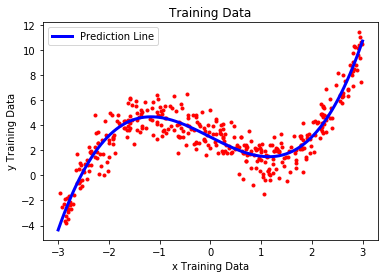

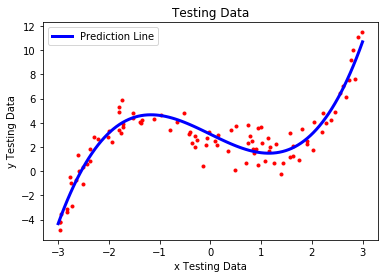

In [5]:
#With algorithm created from training data, create a prediction line
x_new = np.linspace(-3,3,100).reshape(100,1)
y_predict = polynomial_regression.predict(x_new)

plt.plot(x_train, y_train, 'r.')
plt.plot(x_new,y_predict, 'b-', linewidth = 3, label = 'Prediction Line')
plt.xlabel('x Training Data')
plt.ylabel('y Training Data')
plt.title('Training Data')
plt.legend()
plt.show()

plt.plot(x_test, y_test, 'r.')
plt.plot(x_new,y_predict, 'b-', linewidth = 3, label = 'Prediction Line')
plt.xlabel('x Testing Data')
plt.ylabel('y Testing Data')
plt.title('Testing Data')
plt.legend()
plt.show()

In [6]:
#Make predictions based on training and testing data respectively
y_train_poly = polynomial_regression.predict(x_train)
y_test_poly = polynomial_regression.predict(x_test)

m = mean_squared_error(y_train,y_train_poly)
n = mean_squared_error(y_test,y_test_poly)

print('Training Data MSE:',m)
print('Testing Data MSE:',n)


Training Data MSE: 0.9817817186209571
Testing Data MSE: 0.9837219889744455


In [7]:
# This function will plot learning curves for you
# It uses train_test_split which automaticaly gives you a random split of your data 
# into testing and validation groups
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        # Fit the model to the first m elements of the training set
        model.fit(X_train[:m], y_train[:m])
        # Predict from the first m elements of the training set
        y_train_predict = model.predict(X_train[:m])
        # Predict from the validation set
        y_val_predict = model.predict(X_val)
        # Calculate the training error
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        # Calculate the validation error
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # Plot the resulting curves
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)       

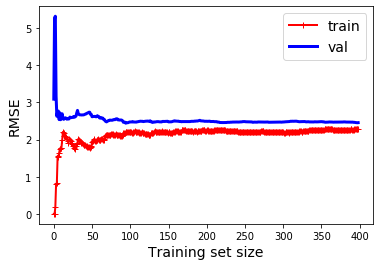

In [8]:
#Learning curve for linear regression
plot_learning_curves(lm,x,y)

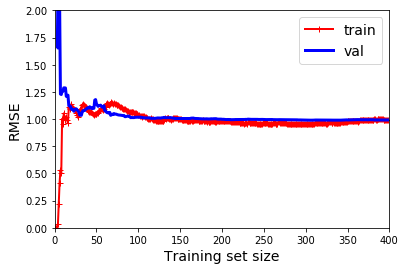

In [9]:
#Learning curve for polynomial regression
plot_learning_curves(polynomial_regression,x,y)
plt.axis([0, 400, 0, 2])
plt.show()

### Question 2 - Discuss your model from question 1. 

- What were your models strengths and weaknesses? 
- What choices and assumptions did you need to make along the way and why were they good choices?
- What things did you try before chosing your final "good" model?

I believe one of my model's strengths is the fact I got the mean square error for the training data relatively equal to that of the trsting data mean squared error. This means that the model created a prediction line quite useful in making predictions with lower inaccuracy. Even my learning curve for the polynomial regression of the training data and testing data begin merging as the training set size grows. But when creating my algorithm, I tried keeping my degree for the polynomial relatively small because the bigger it gets, the more it tries to match the pattern of the training data, but the lest useful it is when making predictions as it is becoming more and more specifically useful for the training data, nothing much else. So Initially started at 10. But as I increased it, the MSE for the training data decresed, but the test data increased, which is against the purpose. I found as the degree decreased, mse of training data increased and testing descreased. I eventually made it to a power of three since, as I said before, both the training data and testing data mse was relatively equal.

### Question 3 - Import the data set below and do a full classification analysis

- Plot the data and choose a model for your decission boundary
- Separate your data into training and validation data using train_test_split
- Train your model using the training data
- Plot your model prediction on BOTH the training and validation data
- Report how your model did for BOTH the training and validataion data.


NOTE: For the last part

You could report your True Positive (TPR) and False Positive (FPR) rates using: 

from sklearn.metrics import roc_curve

to generate the TPR and FPR.

- OR - 

you can calculate your percent correct by hand:

pred_y=model.predict(X)
score=pred_y==y
score.value_counts()

#### THEN

- Reassess your model selection. You should try a few different polynomials and even linear decission boundaries before you are convinced you have a "good enough" model. This experimentation should be reflected in Question 4 where you discuss your approach and things you tried.

(100, 2)
(100,)


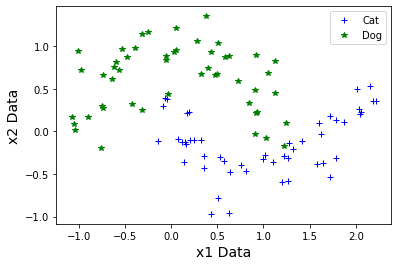

In [10]:
# Data for question 3
df_logdata = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/Moons_Log_data.csv',  
    sep=',')
pd.get_dummies(df_logdata,prefix=['Animal']).head()

x_data = df_logdata[['X1 data','X2 data']].to_numpy()
y_data = pd.get_dummies(df_logdata,prefix=['Animal'])['Animal_Dog']
print(x_data.shape)
print(y_data.shape)

plt.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], "b+", label='Cat')
plt.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], "g*", label='Dog')
plt.xlabel('x1 Data', fontsize = 14)
plt.ylabel('x2 Data',fontsize = 14)
plt.legend()
plt.show()

(80, 2) (20, 2) (80,) (20,)


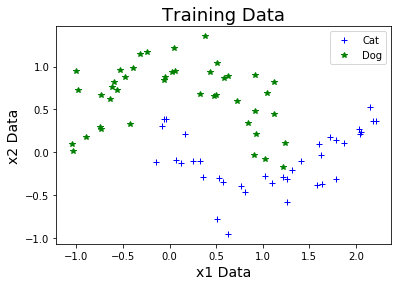

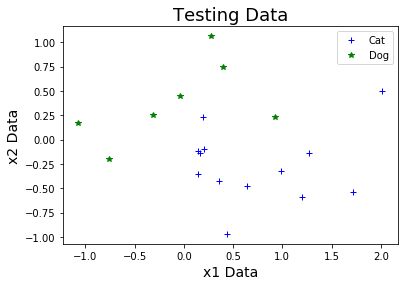

In [11]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.2, random_state=10)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

plt.plot(x_train2[y_train2==0, 0], x_train2[y_train2==0, 1], "b+", label='Cat')
plt.plot(x_train2[y_train2==1, 0], x_train2[y_train2==1, 1], "g*", label='Dog')
plt.xlabel('x1 Data', fontsize = 14)
plt.ylabel('x2 Data',fontsize = 14)
plt.title('Training Data', fontsize = 18)
plt.legend()
plt.show()

plt.plot(x_test2[y_test2==0, 0], x_test2[y_test2==0, 1], "b+", label='Cat')
plt.plot(x_test2[y_test2==1, 0], x_test2[y_test2==1, 1], "g*", label='Dog')
plt.xlabel('x1 Data', fontsize = 14)
plt.ylabel('x2 Data',fontsize = 14)
plt.title('Testing Data', fontsize = 18)
plt.legend()
plt.show()

In [12]:
poly2 = PolynomialFeatures(degree=6, include_bias=False)
lm2 = LogisticRegression(solver='lbfgs')

polynomial_regression2 = Pipeline([
        ("poly_features", poly2),
        ("log_reg", lm2),
    ])

polynomial_regression2.fit(x_train2, y_train2)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=6, include_bias=False,
                                    interaction_only=False, order='C')),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

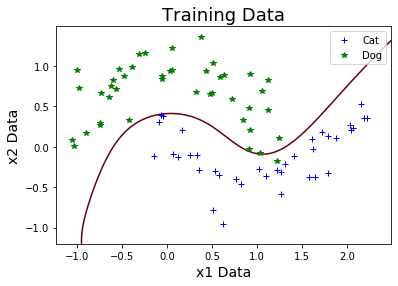

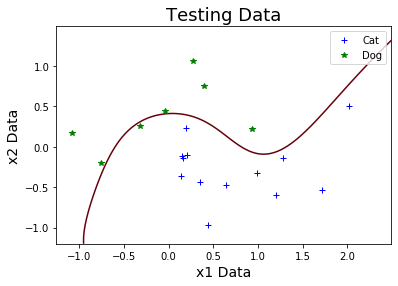

In [13]:
## plot decision boundary 
## -- thanks to --
## https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
xx, yy = np.mgrid[-1:2.5:.01, -1.2:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = polynomial_regression2.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contour(xx, yy, probs, levels=[.5], cmap="Reds", vmin=0)
plt.plot(x_train2[y_train2==0, 0], x_train2[y_train2==0, 1], "b+", label='Cat')
plt.plot(x_train2[y_train2==1, 0], x_train2[y_train2==1, 1], "g*", label='Dog')
plt.xlabel('x1 Data', fontsize = 14)
plt.ylabel('x2 Data',fontsize = 14)
plt.title('Training Data', fontsize = 18)
plt.legend()
plt.show()

plt.plot(x_test2[y_test2==0, 0], x_test2[y_test2==0, 1], "b+", label='Cat')
plt.plot(x_test2[y_test2==1, 0], x_test2[y_test2==1, 1], "g*", label='Dog')
plt.contour(xx, yy, probs, levels=[.5], cmap="Reds", vmin=0)
plt.xlabel('x1 Data', fontsize = 14)
plt.ylabel('x2 Data',fontsize = 14)
plt.title('Testing Data', fontsize = 18)
plt.legend()
plt.show()

In [14]:
y_pred=polynomial_regression2.predict(x_data)
score=(y_pred==y_data)

Passed = 0
Failed = 0

for i in range(len(score)):
    if(score[i] == True):
        Passed += 1
    elif(score[i] == False):
        Failed += 1

print('Percent Accurate: {}%'.format(Passed*100 / len(score)))
print('Percent Inaccurate: {}%'.format(Failed*100 / len(score)))

Percent Accurate: 98.0%
Percent Inaccurate: 2.0%


### Question 4 - Discuss your model from question 3. 

- What were your models strengths and weaknesses? 
- What choices and assumptions did you need to make along the way and why were they good choices?
- What things did you try before chosing your final "good" model?

Now the logistic polynomial regression was definetly a bit different due to the degree the polynomial had. From before, the lower the degree, the more accurate for the test data. However, this time around, the best results for accuracy for was either degree 5 or 6. Going below or above would increase inaccuracy, which I find very interesting. In this time around, unlike predicting how close the data was to the regression line, this time it was how accurate it was between seperating cats from dogs. For the most part, my prediction faired quite well, besides the few outliers that din't quite fit.

### Do you have an overall questions or ideas from linear, logistic, or polynomial regression that you would like us to revisit in class?

In [15]:
print('Already got my questions answered today since I had to redo the assignment')

Already got my questions answered today since I had to redo the assignment
